In [55]:
import cv2
import pandas
import os
import glob
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [56]:
print(os.listdir("Ayush_us_data/"))

['train', 'test', 'avg_frame']


In [57]:
train_labels=[]
train_rest=[]
train_wrist=[]
train_point=[]
train_power=[]
rest=cv2.imread("./Ayush_us_data/avg_frame/rest.jpg",cv2.IMREAD_GRAYSCALE)
point=cv2.imread("./Ayush_us_data/avg_frame/point.jpg",cv2.IMREAD_GRAYSCALE)
wrist=cv2.imread("./Ayush_us_data/avg_frame/wrist.jpg",cv2.IMREAD_GRAYSCALE)
power=cv2.imread("./Ayush_us_data/avg_frame/power.jpg",cv2.IMREAD_GRAYSCALE)


def correlation_img(frame1,frame2):
    m1=np.mean(frame1)
    m2=np.mean(frame2)
    num1=np.sum(np.multiply(np.subtract(frame1,m1),np.subtract(frame2,m2)))
    den1=np.sum(np.multiply(np.emath.sqrt(np.square(np.subtract(frame1,m1))),np.emath.sqrt(np.square(np.subtract(frame2,m2)))))
    return (num1/den1)

In [58]:
for dir in glob.glob("Ayush_us_data/train/*"):
    label=dir.split("/")[-1]
    print(label)
    for img_name in os.listdir(dir):
        path=os.path.join(dir,img_name)       
        img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        corr_rest=correlation_img(rest,img)
        corr_power=correlation_img(power,img)
        corr_wrist=correlation_img(wrist,img)
        corr_point=correlation_img(point,img)
        train_labels.append(label)
        train_point.append(corr_point)
        train_power.append(corr_power)
        train_wrist.append(corr_wrist)
        train_rest.append(corr_rest)

train_point=np.array(train_point)
train_rest=np.array(train_rest)
train_wrist=np.array(train_wrist)
train_power=np.array(train_power)
train_labels=np.array(train_labels)

point
power
rest
wrist


In [59]:
test_labels=[]
test_rest=[]
test_wrist=[]
test_point=[]
test_power=[]

In [60]:
for t_dir in glob.glob("Ayush_us_data/test/*"):
    t_label=t_dir.split("/")[-1]
    print(t_dir)
    for t_img_name in os.listdir(t_dir):
        t_path=os.path.join(t_dir,t_img_name)
        t_img=cv2.imread(t_path, cv2.IMREAD_GRAYSCALE)
        t_corr_rest=correlation_img(rest,t_img)
        t_corr_power=correlation_img(power,t_img)
        t_corr_wrist=correlation_img(wrist,t_img)
        t_corr_point=correlation_img(point,t_img)
        test_labels.append(t_label)
        test_point.append(t_corr_point)
        test_power.append(t_corr_power)
        test_wrist.append(t_corr_wrist)
        test_rest.append(t_corr_rest)


test_point=np.array(test_point)
test_rest=np.array(test_rest)
test_wrist=np.array(test_wrist)
test_power=np.array(test_power)
test_labels=np.array(test_labels)

Ayush_us_data/test/point
Ayush_us_data/test/power
Ayush_us_data/test/rest
Ayush_us_data/test/wrist


In [72]:
labell=["point","point","point","point","point"]
powerr=[0.78,0.79,0.77,0.78,0.76]
restt=[0.72,0.71,0.73,0.71,0.74]
wristt=[0.68,0.69,0.72,0.67,0.70]
pointt=[0.88,0.89,0.87,0.90,0.91]
powerr=np.array(powerr)
restt=np.array(restt)
wristt=np.array(wristt)
pointt=np.array(pointt)
labell=np.array(labell)

In [61]:
encoder=preprocessing.LabelEncoder()
encoder.fit(test_labels)
encoded_test_labels=encoder.transform(test_labels)
encoder.fit(train_labels)
encoded_train_labels=encoder.transform(train_labels)

In [73]:
df_train=pandas.DataFrame()
df_train['label']=train_labels
df_train['power']=train_power
df_train['rest']=train_rest
df_train['point']=train_point
df_train['wrist']=train_wrist


,img_label,power_corr,rest_corr,point_corr,wrist_corr
0,point,0.78,0.72,0.88,0.68
1,point,0.79,0.71,0.89,0.69
2,point,0.77,0.73,0.87,0.72
3,point,0.78,0.71,0.90,0.67
4,point,0.76,0.74,0.91,0.70


In [63]:
df_test=pandas.DataFrame()
df_test['label']=encoded_test_labels
df_test['power']=test_power
df_test['rest']=test_rest
df_test['point']=test_point
df_test['wrist']=test_wrist


In [64]:
df_train.head()

,label,power,rest,point,wrist
0,0,0.988719,0.991866,0.998515,0.981419
1,0,0.987687,0.990932,0.998051,0.981387
2,0,0.987712,0.990915,0.998029,0.981414
3,0,0.987685,0.990879,0.998031,0.981387
4,0,0.987643,0.990951,0.998112,0.981413


In [65]:
x_data = df_train.drop(['label'],axis=1)
y_data=df_train['label']
x_test=df_test.drop(['label'],axis=1)
y_test=df_test['label']

In [66]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_data,y_data)
ypred=knn_clf.predict(x_test)

In [67]:
result=accuracy_score(y_test,ypred)
print(result)

1.0


In [68]:
conf_matrix=confusion_matrix(y_test,ypred)

<AxesSubplot: >

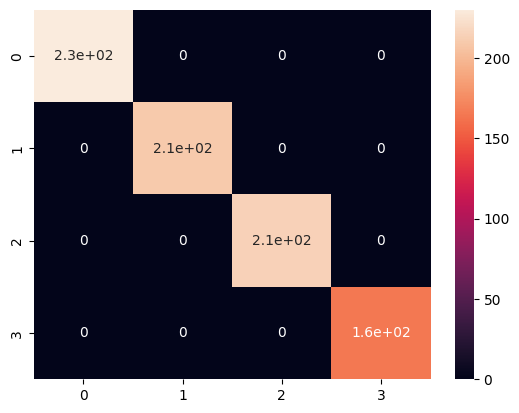

In [69]:
sns.heatmap(conf_matrix, annot=True)